

Multi linear regression 

50-startups problem


In [1]:
#import libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [2]:
# loading the data
startup=pd.read_csv('https://github.com/dipak3031/multi-regression-1/files/10148326/50_Startups.csv')
startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


**EDA**

In [3]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


All datatypes are correct.


In [4]:
# Dscriptive analysis
startup.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [5]:
# checking for null values
startup.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

there are no missing values in dataset

In [6]:
startup.shape

(50, 5)

In [7]:
# renaming columns
data=startup.rename({'R&D Spend':'rds','Administration':'admin','Marketing Spend':'marketing','State':'state','Profit':'profit'},axis=1)
data.head()

,rds,admin,marketing,state,profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [8]:
# for finding duplicate values
data[data.duplicated()]

,rds,admin,marketing,state,profit


There are no duplicate values in dataset.

**Correlation**

In [9]:
data.corr()

,rds,admin,marketing,profit
rds,1.000000,0.241955,0.724248,0.972900
admin,0.241955,1.000000,-0.032154,0.200717
marketing,0.724248,-0.032154,1.000000,0.747766
profit,0.972900,0.200717,0.747766,1.000000


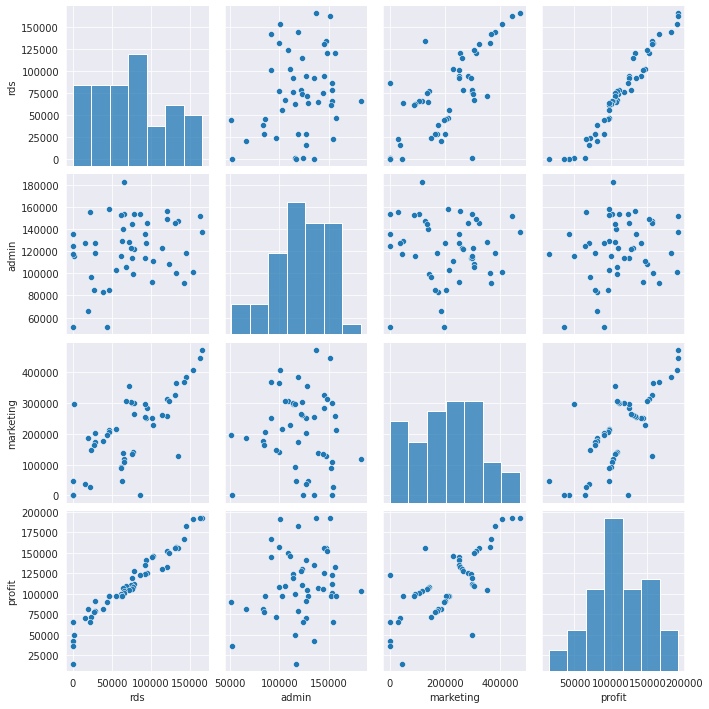

In [10]:
sns.set_style(style='darkgrid')
sns.pairplot(data)

**Model Building**

In [11]:
model = smf.ols("profit~rds+admin+marketing",data=data).fit()

**Model Testing**

In [12]:
# finding coefficient parameter
model.params

Intercept    50122.192990
rds              0.805715
admin           -0.026816
marketing        0.027228
dtype: float64

In [13]:
# finding tvalues and pvalues
model.tvalues , np.round(model.pvalues,5)

(Intercept     7.626218
 rds          17.846374
 admin        -0.525507
 marketing     1.655077
 dtype: float64, Intercept    0.00000
 rds          0.00000
 admin        0.60176
 marketing    0.10472
 dtype: float64)

In [14]:
# finding rsquared values
model.rsquared , model.rsquared_adj

(0.9507459940683246, 0.9475337762901719)

Model accuracy = 94.75%

In [15]:
# build SLR and MLR models for insignificant variables 'admin' and 'marketing'
slr_admin=smf.ols("profit~admin",data=data).fit()

In [16]:
# finding tvalues and pvalues
slr_admin.tvalues , slr_admin.pvalues

(Intercept    3.040044
 admin        1.419493
 dtype: float64, Intercept    0.003824
 admin        0.162217
 dtype: float64)

In [17]:
# for marketing
slr_mark=smf.ols("profit~marketing",data=data).fit()
slr_mark.tvalues,slr_mark.pvalues

(Intercept    7.808356
 marketing    7.802657
 dtype: float64, Intercept    4.294735e-10
 marketing    4.381073e-10
 dtype: float64)

In [18]:
# for admin+marketing MLR
mlr_am=smf.ols("profit~admin+marketing",data=data).fit()
mlr_am.tvalues,mlr_am.pvalues

(Intercept    1.142741
 admin        2.467779
 marketing    8.281039
 dtype: float64, Intercept    2.589341e-01
 admin        1.729198e-02
 marketing    9.727245e-11
 dtype: float64)

**Model Validation**

**1.Colinearity check**

In [19]:
# 1) Colinearity Problem Check
# Calculate VIF = 1/(1-Rsquare) for all independent variables

rsq_r=smf.ols("rds~admin+marketing",data=data).fit().rsquared
vif_r=1/(1-rsq_r)

In [20]:
rsq_a=smf.ols("admin~rds+marketing",data=data).fit().rsquared
vif_a=1/(1-rsq_a)

In [21]:
rsq_m=smf.ols("marketing~rds+admin",data=data).fit().rsquared
vif_m=1/(1-rsq_m)

In [22]:
# Putting the values in Dataframe format
data1={'Variables':['rds','admin','marketing'],'Vif':[vif_r,vif_a,vif_m]}
Vif_df=pd.DataFrame(data1)
Vif_df

,Variables,Vif
0,rds,2.468903
1,admin,1.175091
2,marketing,2.326773


**2.Residual Analysis**

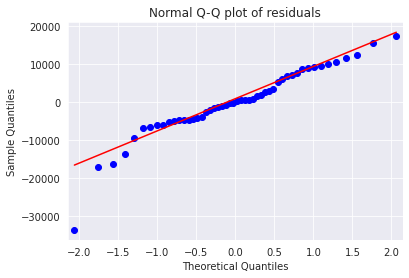

In [23]:
import statsmodels.api as sm
model=smf.ols("profit~rds+admin+marketing",data=data).fit()
qqplot=sm.qqplot(model.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

Data showing homoscedacity

In [24]:
list(np.where(model.resid>10))

[array([ 1,  2,  3,  8, 10, 11, 12, 13, 16, 19, 20, 25, 28, 30, 34, 35, 36,
        37, 38, 40, 41, 42, 43, 44, 45])]

**Residual Plot for Homoscedasticity**

In [25]:
model=smf.ols("profit~rds+admin+marketing",data=data).fit()

In [26]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sun, 04 Dec 2022   Prob (F-statistic):           4.53e-30
Time:                        11:28:45   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
rds            0.8057      0.045     17.846      0.000       0.715       0.897
admin         -0.0268      0.051     -0.526      0.602      -0.130       0.076
marketing      0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

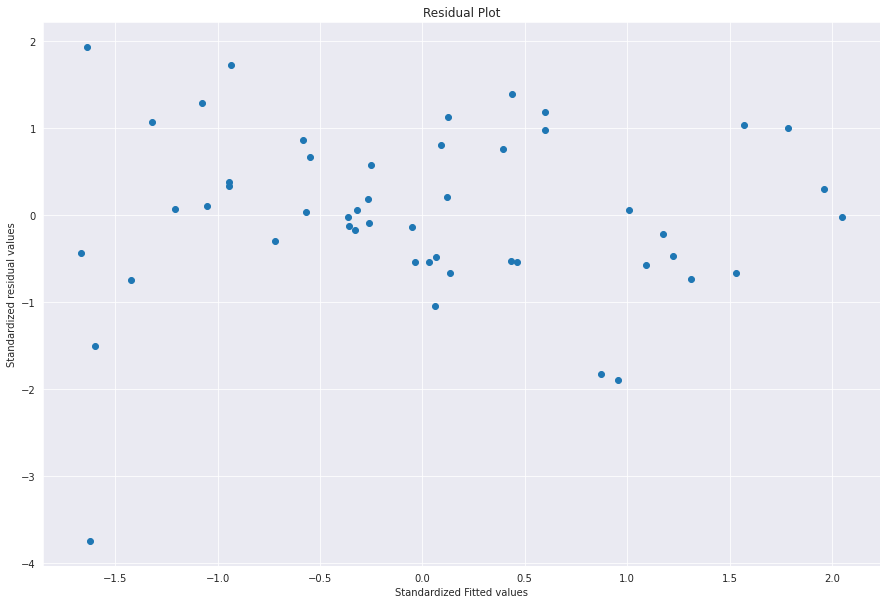

In [28]:
plt.figure(figsize=(15,10))
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

**Residual Vs Regressors plots**

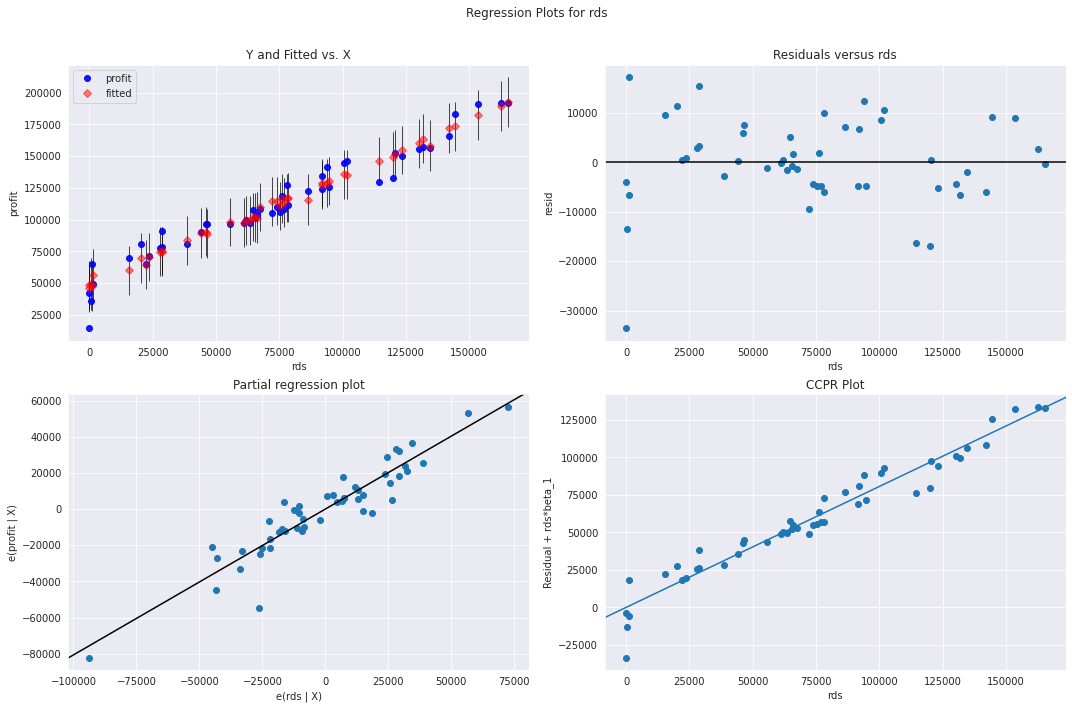

In [29]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model, "rds", fig=fig)
plt.show()

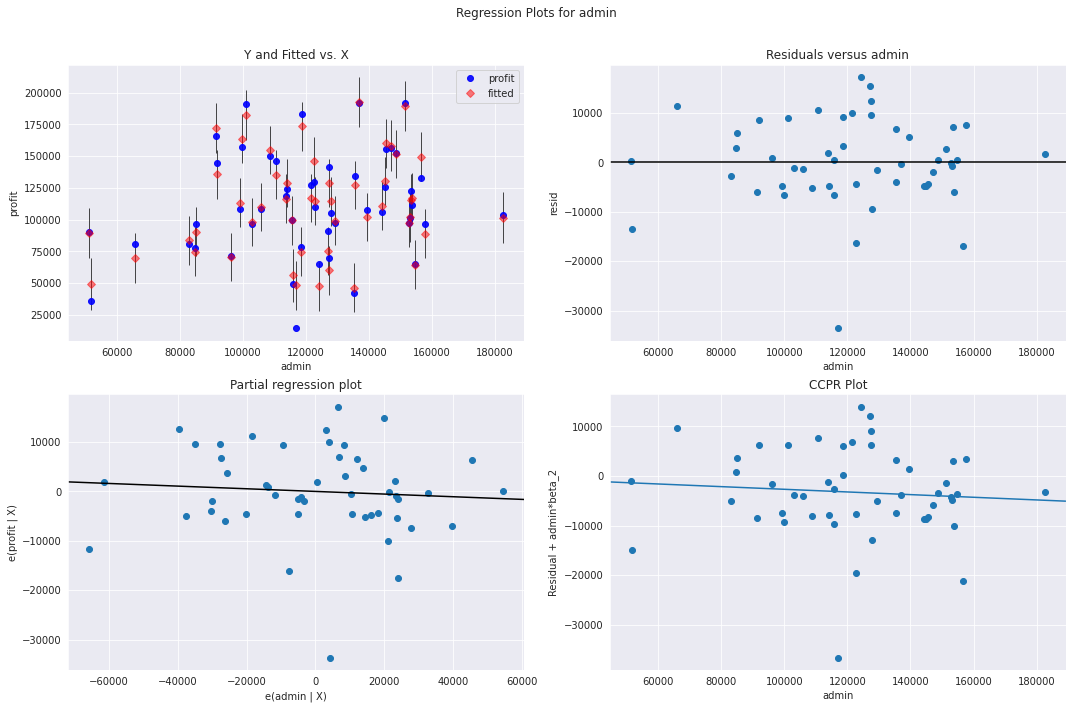

In [30]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model, "admin", fig=fig)
plt.show()

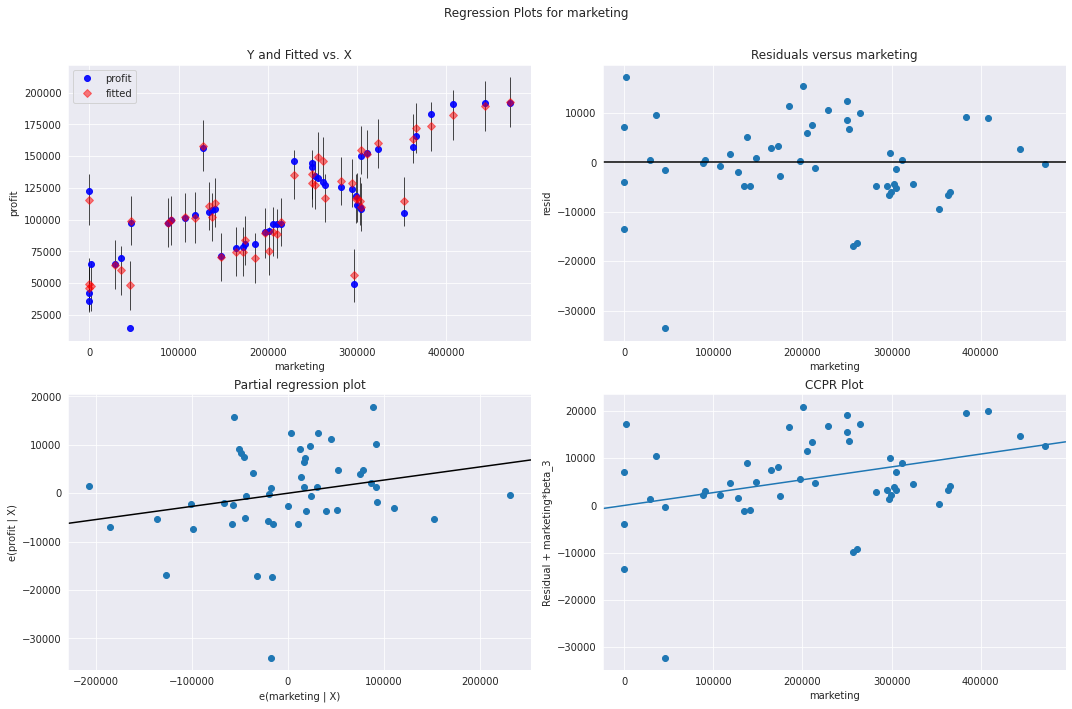

In [31]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model, "marketing", fig=fig)
plt.show()

**Identify the outliers**

by cook's distance

In [32]:
from statsmodels.graphics.regressionplots import influence_plot

model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

<ipython-input-33-57a92d19091d>:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(startup)), np.round(c, 3))


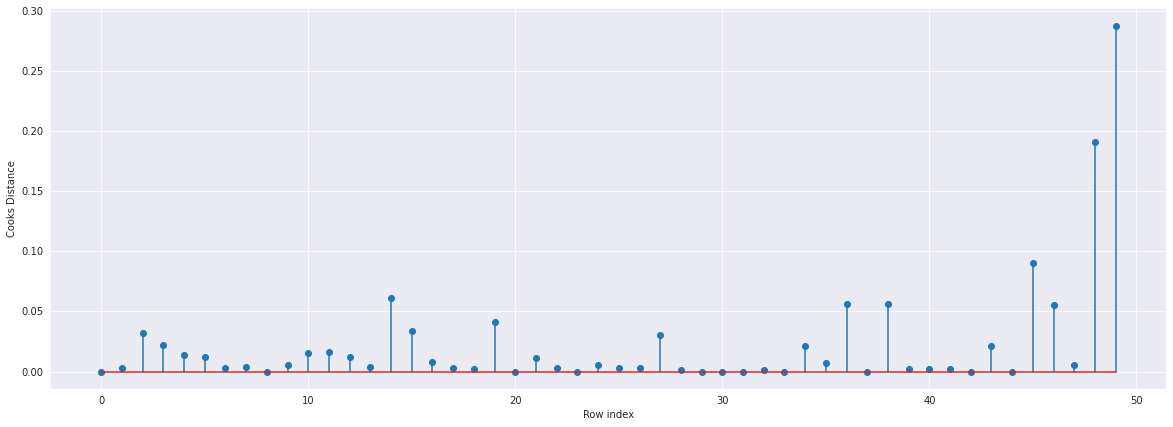

In [33]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(startup)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

index and value of the influencer where c is more than 0.5

In [34]:
(np.argmax(c),np.max(c))

(49, 0.2880822927543272)

**High Influence points**

In [35]:
k = startup.shape[1]
n = startup.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.36

In [36]:
from statsmodels.graphics.regressionplots import influence_plot


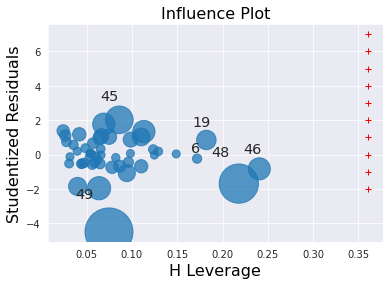

In [37]:
influence_plot(model,alhpa=0.5)

y=[i for i in range(-2,8)]
x=[leverage_cutoff for i in range(10)]
plt.plot(x,y,'r+')

plt.show()

we can see in above plot,that the data point 49 is the influencer.

In [38]:
data[data.index.isin([49])]

,rds,admin,marketing,state,profit
49,0.0,116983.8,45173.06,California,14681.4


**Improving the model**

In [39]:
#Discard the data points which are influencers and reasign the row number (reset_index())
data2=data.drop(startup.index[[49]],axis=0).reset_index(drop=True)

In [40]:
data2

,rds,admin,marketing,state,profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


**Final Model**

In [41]:
# model delation diagnosis
while np.max(c)>0.5 :
    model=smf.ols("profit~rds+admin+marketing",data=data2).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    data_=data2.drop(data2.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    data_
else:
    final_model=smf.ols("profit~rds+admin+marketing",data=data2).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.9613162435129848


In [42]:
final_model.rsquared

0.9613162435129848

In [43]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Sun, 04 Dec 2022   Prob (F-statistic):           8.85e-32
Time:                        11:28:56   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
rds            0.7830      0.038     20.470      0.000       0.706       0.860
admin         -0.0222      0.043     -0.518      0.607      -0.109       0.064
marketing      0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Model prediction**

In [44]:
# prediction for new data
startup1=pd.DataFrame({'rds':70000,"admin":90000,"marketing":140000},index=[0])
startup1

,rds,admin,marketing
0,70000,90000,140000


In [45]:
# Manual Prediction of Price
final_model.predict(startup1)

0    108727.154753
dtype: float64

In [46]:
# Automatic Prediction of Price 
pred_y=final_model.predict(data)
pred_y

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
49     50925.119153


In [47]:
d2={'Prep_Models':['Model','Final_Model'],'Rsquared':[model.rsquared,final_model.rsquared]}
table=pd.DataFrame(d2)
table

,Prep_Models,Rsquared
0,Model,0.950746
1,Final_Model,0.961316
